In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/ACER/Downloads/product/product_data0.csv")
for i in range(1,25):
    try:
        df2=pd.read_csv("C:/Users/ACER/Downloads/product/product_data{}.csv".format(i))
        df = pd.concat([df, df2], axis=0)
    except:
        continue
df.to_csv("C:/Users/ACER/Downloads/data_demo.csv",index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 110
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2790 non-null   float64
 1   sku                      2790 non-null   float64
 2   short_description        2790 non-null   object 
 3   price                    2790 non-null   float64
 4   list_price               2790 non-null   float64
 5   price_usd                0 non-null      float64
 6   discount                 2790 non-null   float64
 7   discount_rate            2790 non-null   float64
 8   review_count             2790 non-null   float64
 9   order_count              0 non-null      float64
 10  inventory_status         2790 non-null   object 
 11  is_visible               0 non-null      float64
 12  stock_item_qty           2790 non-null   float64
 13  stock_item_max_sale_qty  2790 non-null   float64
 14  product_name             

In [4]:
df=df.drop(['short_description','price_usd','order_count','inventory_status','is_visible','stock_item_qty','stock_item_max_sale_qty','product_name'],axis=1)
df

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
0,435870.0,8.006427e+12,808000.0,954556.0,146556.0,15.0,808.0,145924.0,Ensure,28546.0,4.8,do-choi-me-be,2549
1,57044926.0,3.629907e+12,919000.0,1078000.0,159000.0,15.0,302.0,149737.0,Pediasure,2764.0,5.0,do-choi-me-be,2549
2,24030105.0,5.781212e+12,599000.0,733282.0,134282.0,18.0,528.0,149737.0,Pediasure,8055.0,4.8,do-choi-me-be,2549
3,24028050.0,9.863682e+12,1005000.0,1238569.0,233569.0,19.0,716.0,149737.0,Pediasure,12707.0,4.8,do-choi-me-be,2549
4,24026125.0,2.973806e+12,1239000.0,1426944.0,187944.0,13.0,257.0,149741.0,Glucerna,2837.0,5.0,do-choi-me-be,2549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,213710314.0,4.601854e+12,1019000.0,1019000.0,0.0,0.0,1.0,27464.0,TP-Link,1.0,5.0,may-anh,1801
107,199532725.0,6.558414e+12,1350000.0,2000000.0,650000.0,33.0,11.0,545395.0,ASPORT,31.0,4.5,may-anh,1801
108,195864060.0,5.237590e+12,2000000.0,2000000.0,0.0,0.0,43.0,228755.0,Andbon,205.0,4.8,may-anh,1801
109,68454398.0,3.292439e+12,129999.0,129999.0,0.0,0.0,11.0,193617.0,VSGO,31.0,4.6,may-anh,1801


In [5]:
df.describe()

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,quantity_sold,rating_average
count,2.790000e+03,2.790000e+03,2.790000e+03,2.790000e+03,2.790000e+03,2790.000000,2790.000000,2.790000e+03,2790.000000,2790.000000
mean,1.212932e+08,5.477860e+12,6.643494e+05,8.391714e+05,1.748220e+05,14.543728,127.037634,8.486860e+05,966.222222,4.462545
std,7.062958e+07,2.609414e+12,2.438186e+06,2.914660e+06,7.634445e+05,18.161916,362.084557,1.764802e+06,4178.606295,1.001536
min,1.809120e+05,1.012204e+12,2.000000e+03,2.000000e+03,0.000000e+00,0.000000,0.000000,1.782500e+04,1.000000,0.000000
25%,6.133695e+07,3.248999e+12,9.200000e+04,1.000000e+05,0.000000e+00,0.000000,3.000000,1.114610e+05,11.000000,4.500000
50%,1.182242e+08,5.359947e+12,1.810000e+05,2.200000e+05,6.714500e+03,5.000000,17.000000,1.114610e+05,73.000000,4.700000
75%,1.863082e+08,7.733732e+12,4.050000e+05,5.057500e+05,9.100000e+04,28.000000,88.000000,3.689340e+05,447.000000,5.000000
max,2.619827e+08,9.984525e+12,5.600000e+07,5.600000e+07,1.300000e+07,92.000000,6739.000000,8.140035e+06,127617.000000,5.000000


<AxesSubplot:>

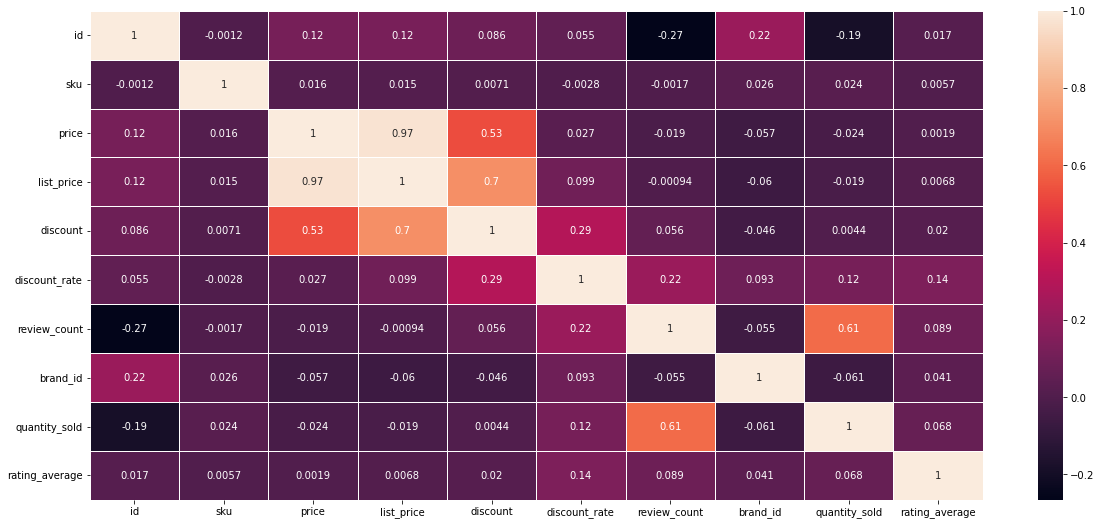

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,9))    
sns.heatmap(corr, annot=True, linewidths=.5)

In [7]:
def univariate_cont_analysis(var,df):
    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode()
    max_val = df[var].max()
    min_val = df[var].min()
    range_val = np.ptp(df[var])
    variance = df[var].var()
    skewness = df[var].skew()
    result = [mean,median,mode,max_val,min_val,range_val,variance,skewness]
    return result

result_list=[]
num_vars = ['price','list_price','discount','discount_rate','review_count','quantity_sold','rating_average']

for var in num_vars:
    result = univariate_cont_analysis(var,df)
    result_list.append(result)
df_result = pd.DataFrame(result_list,columns=['mean','median','mode','max_val','min_val','range_val','variance','skewness'], index=num_vars)

pd.options.display.max_colwidth = 100
df_result

,mean,median,mode,max_val,min_val,range_val,variance,skewness
price,664349.385663,181000.0,"0 99000.0 Name: price, dtype: float64",56000000.0,2000.0,55998000.0,5.944751e+12,11.283132
list_price,839171.387097,220000.0,"0 199000.0 Name: list_price, dtype: float64",56000000.0,2000.0,55998000.0,8.495241e+12,9.526310
discount,174822.001434,6714.5,"0 0.0 Name: discount, dtype: float64",13000000.0,0.0,13000000.0,5.828475e+11,10.503382
discount_rate,14.543728,5.0,"0 0.0 Name: discount_rate, dtype: float64",92.0,0.0,92.0,3.298552e+02,1.028876
review_count,127.037634,17.0,"0 1.0 Name: review_count, dtype: float64",6739.0,0.0,6739.0,1.311052e+05,8.046525
quantity_sold,966.222222,73.0,"0 1.0 Name: quantity_sold, dtype: float64",127617.0,1.0,127616.0,1.746075e+07,16.490937
rating_average,4.462545,4.7,"0 5.0 Name: rating_average, dtype: float64",5.0,0.0,5.0,1.003075e+00,-3.493833


C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

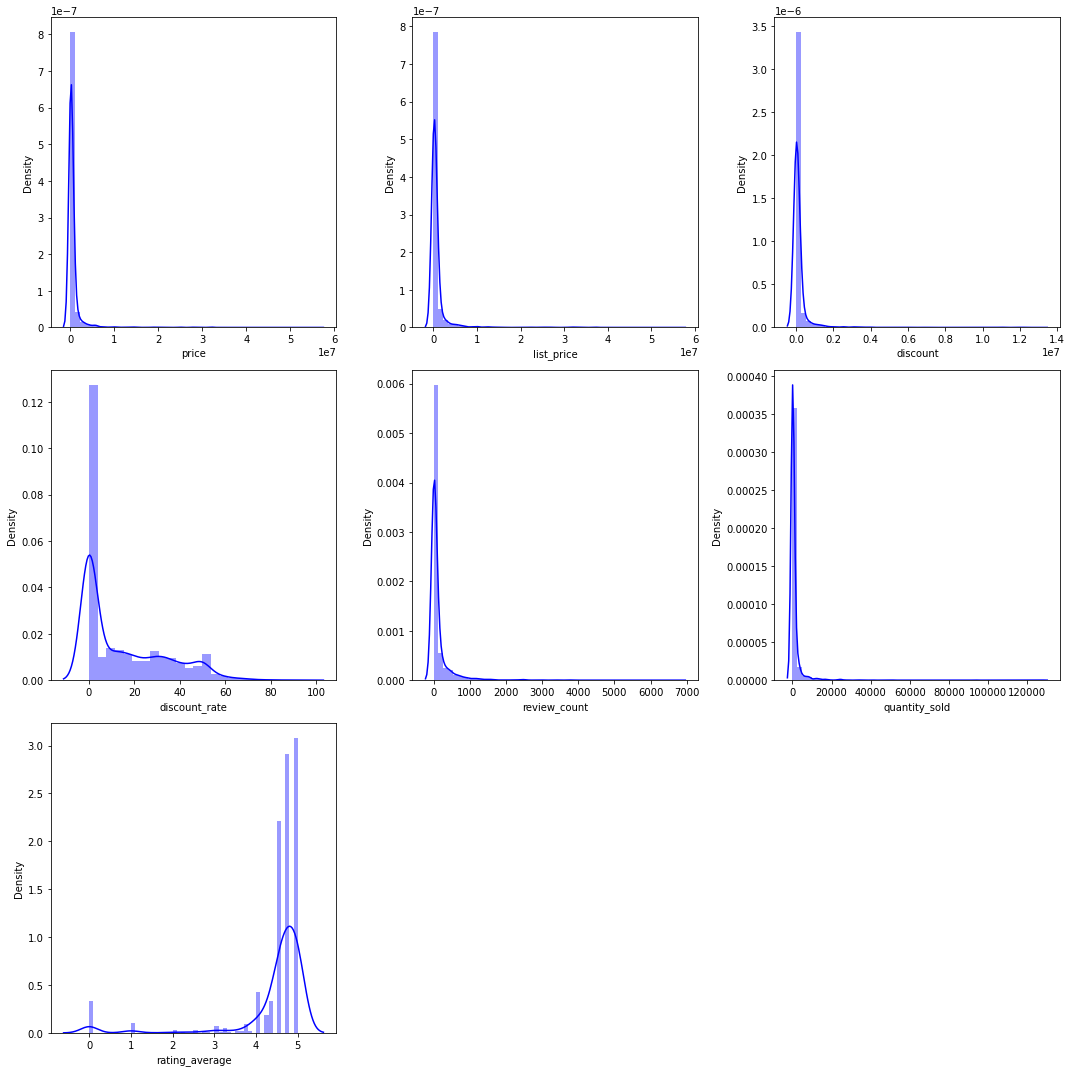

In [8]:
def visualize_histogram(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range(1,len(cont_var)+1):
        plt.subplot(n,3,i)
        sns.distplot(df[cont_var[i-1]].dropna(), color = 'Blue')
    plt.tight_layout()
    plt.show()

visualize_histogram(num_vars, df)

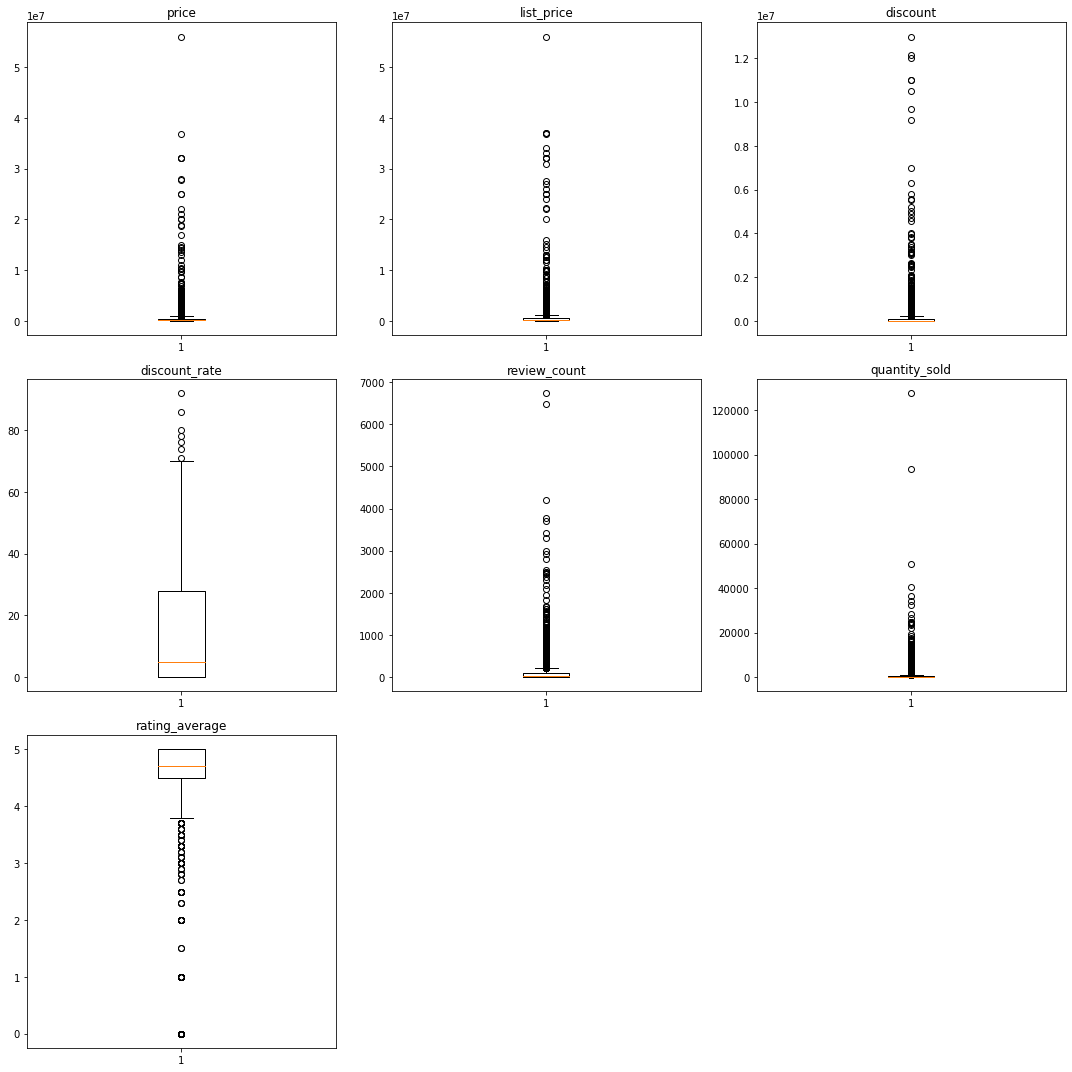

In [9]:
def visualize_boxplot(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range (1,len(cont_var)+1):
        plt.subplot(n,3,i)
        plt.boxplot(df[cont_var[i-1]].dropna())
        plt.title(cont_var[i-1])
    plt.tight_layout()
    plt.show()

visualize_boxplot(num_vars, df)

In [10]:
import scipy
def drop_outliers(num_vars, df):
    for num_var in num_vars:
        upper_limit= np.quantile(df[num_var],0.75) + 1.5*scipy.stats.iqr(df[num_var])
        lower_limit= np.quantile(df[num_var],0.25) - 1.5*scipy.stats.iqr(df[num_var])
        df = df[ (df[num_var]>=lower_limit) & (df[num_var]<=upper_limit)]
    return df
df = drop_outliers(num_vars, df).reset_index(drop=True)

Sau khi xóa outliers

C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

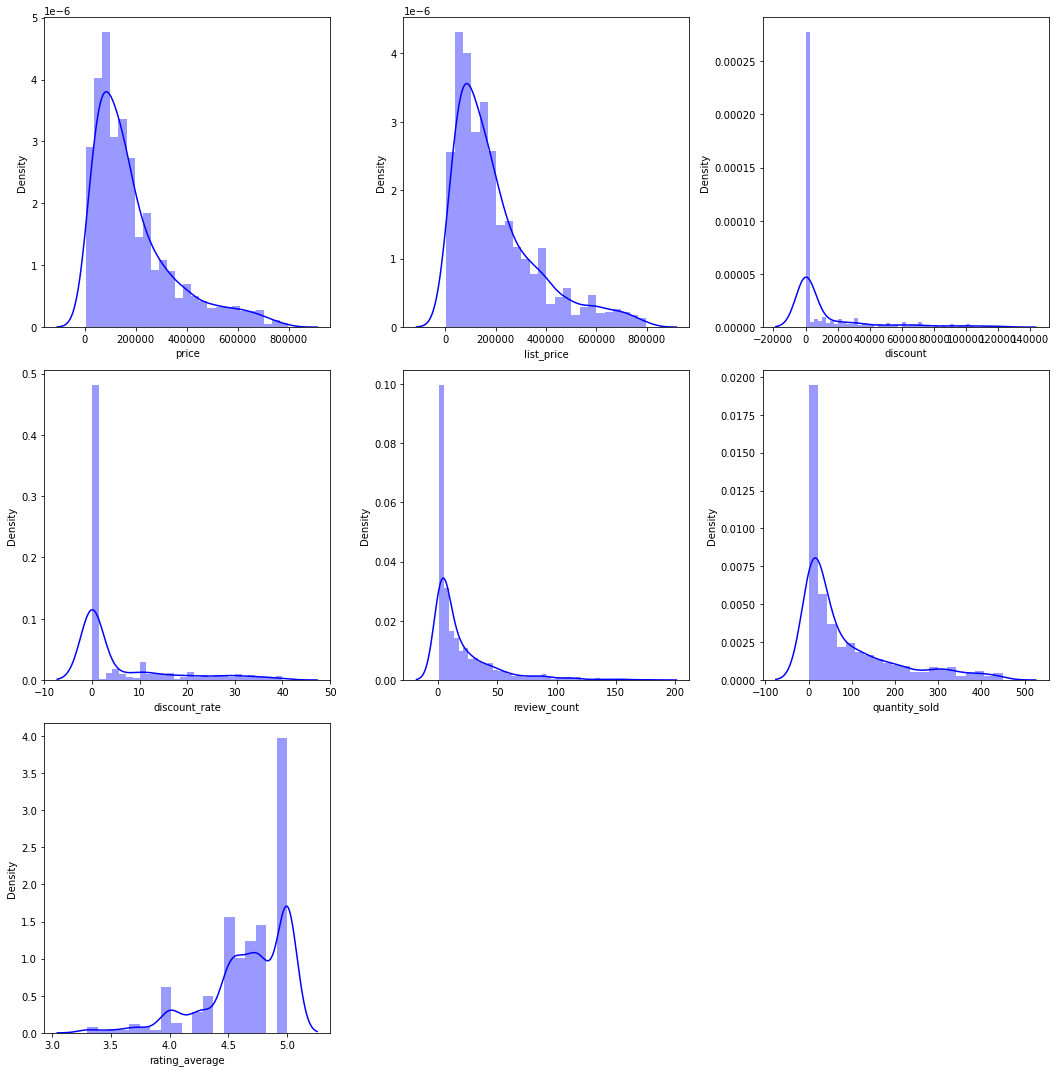

In [11]:
def visualize_histogram(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range(1,len(cont_var)+1):
        plt.subplot(n,3,i)
        sns.distplot(df[cont_var[i-1]].dropna(), color = 'Blue')
    plt.tight_layout()
    plt.show()

visualize_histogram(num_vars, df)

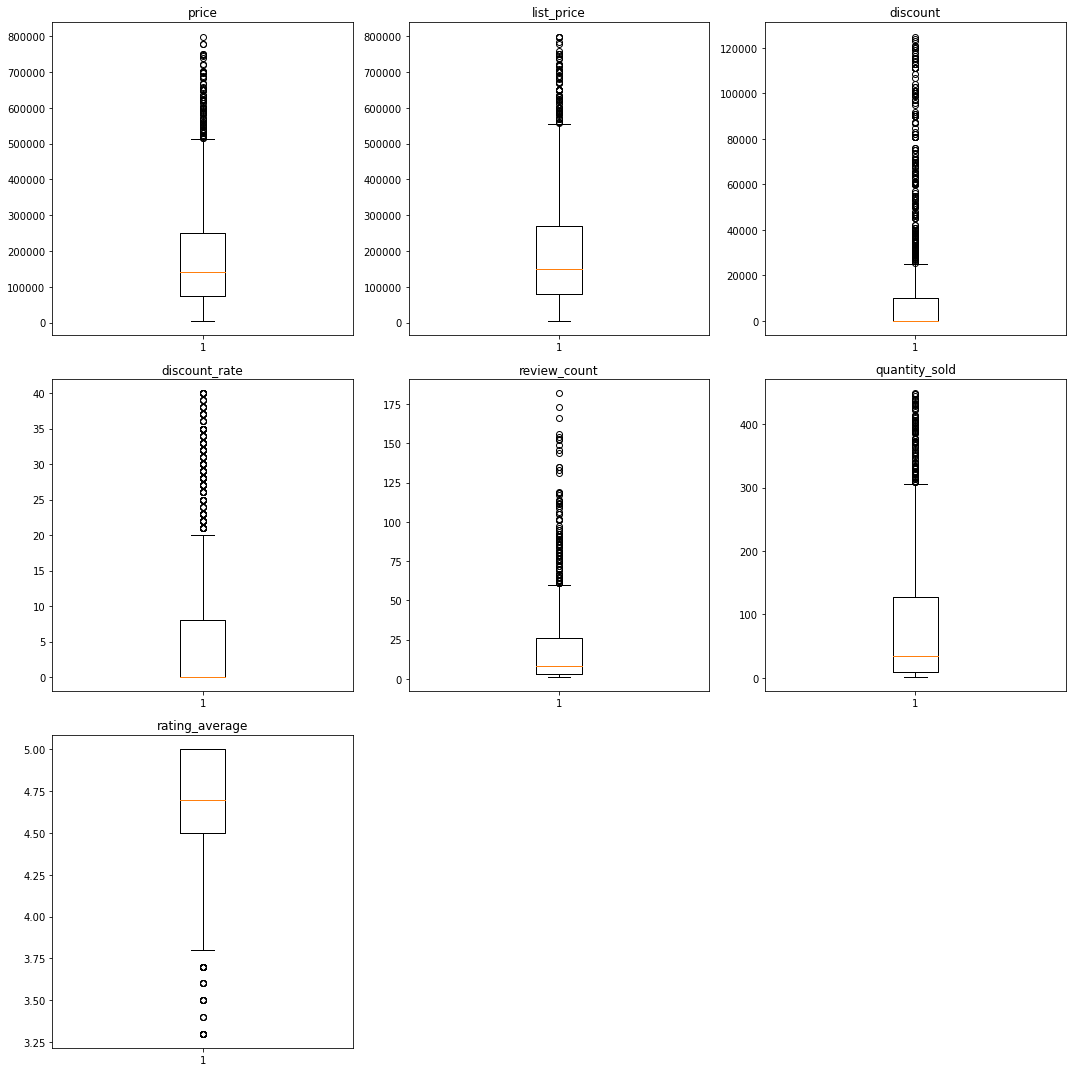

In [12]:
def visualize_boxplot(cont_var, df):
    if len(cont_var)%3 == 0:
        n = len(cont_var)/3
    else:
        n = len(cont_var)//3 + 1
    plt.figure(figsize=(15,15))
    for i in range (1,len(cont_var)+1):
        plt.subplot(n,3,i)
        plt.boxplot(df[cont_var[i-1]].dropna())
        plt.title(cont_var[i-1])
    plt.tight_layout()
    plt.show()

visualize_boxplot(num_vars, df)

<AxesSubplot:xlabel='category_type', ylabel='count'>

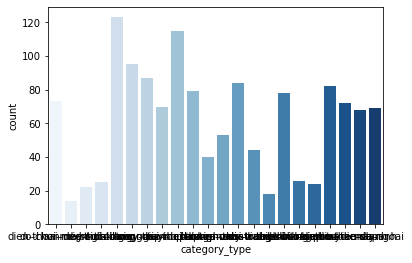

In [13]:
sns.countplot(data=df,x='category_type', palette='Blues')

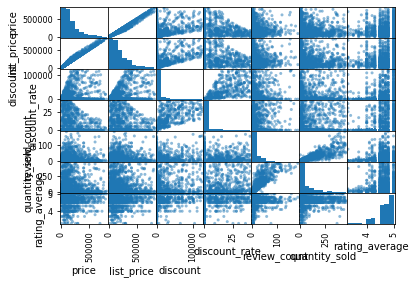

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[num_vars])
plt.show()

In [15]:
df.sort_values(by='discount_rate',ascending=False)

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
585,261982674.0,5.651820e+12,15000.0,25000.0,10000.0,40.0,2.0,111461.0,OEM,4.0,5.0,giay-dep-nam,1686
710,71001452.0,5.274678e+12,179000.0,299000.0,120000.0,40.0,154.0,111461.0,OEM,396.0,4.6,balo-va-vali,6000
989,73611453.0,9.746540e+12,170000.0,284400.0,114400.0,40.0,3.0,25422.0,Xiaomi,17.0,5.0,cross-border-hang-quoc-te,17166
184,146635392.0,1.397130e+12,137000.0,229000.0,92000.0,40.0,13.0,111461.0,OEM,39.0,4.5,thoi-trang-nu,931
1241,13849819.0,6.082752e+12,45000.0,75000.0,30000.0,40.0,36.0,111461.0,OEM,128.0,4.6,the-thao-da-ngoai,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,192729135.0,7.425830e+12,100000.0,100000.0,0.0,0.0,1.0,5367201.0,NHUH20,2.0,5.0,thoi-trang-nu,931
241,169219687.0,5.754290e+12,299000.0,299000.0,0.0,0.0,16.0,561415.0,\tOEM,46.0,4.7,thoi-trang-nu,931
729,171437261.0,5.095826e+12,95000.0,95000.0,0.0,0.0,4.0,111461.0,OEM,43.0,4.8,balo-va-vali,6000
730,58025937.0,9.955375e+12,359000.0,359000.0,0.0,0.0,17.0,4247905.0,ANANSHOP688,46.0,4.5,balo-va-vali,6000


In [16]:
df.sort_values(by='review_count',ascending=False)

,id,sku,price,list_price,discount,discount_rate,review_count,brand_id,brand_name,quantity_sold,rating_average,category_type,category_id
627,71178009.0,2.838805e+12,99000.0,99000.0,0.0,0.0,182.0,5076287.0,GREPACO,440.0,4.8,tui-thoi-trang-nam,27616
802,72562875.0,4.740893e+12,299000.0,299000.0,0.0,0.0,173.0,47882.0,SKMEI,389.0,4.7,dong-ho-va-trang-suc,8371
647,130439350.0,3.327946e+12,179000.0,279000.0,100000.0,36.0,166.0,111461.0,OEM,372.0,4.7,tui-thoi-trang-nam,27616
579,73746789.0,6.073933e+12,325000.0,450000.0,125000.0,28.0,156.0,4267275.0,ZAVAS,289.0,5.0,giay-dep-nam,1686
710,71001452.0,5.274678e+12,179000.0,299000.0,120000.0,40.0,154.0,111461.0,OEM,396.0,4.6,balo-va-vali,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,177713082.0,8.520735e+12,46200.0,46200.0,0.0,0.0,1.0,111461.0,OEM,5.0,5.0,thoi-trang-nam,915
289,94692862.0,7.305211e+12,50000.0,50000.0,0.0,0.0,1.0,111461.0,OEM,1.0,4.0,thoi-trang-nam,915
290,160845877.0,3.021834e+12,160000.0,160000.0,0.0,0.0,1.0,149236.0,EOM,3.0,5.0,thoi-trang-nam,915
292,184800905.0,2.330761e+12,130000.0,130000.0,0.0,0.0,1.0,111461.0,OEM,1.0,4.0,thoi-trang-nam,915


In [17]:
df.groupby(['brand_name']).max()['price'].sort_values(ascending=False)

brand_name
TOTOLINK           799000.0
SAIGIO             779000.0
Panasonic          750000.0
Cherelle Beauty    750000.0
Nutren             749000.0
                     ...   
CCC                 19000.0
jones'.             18000.0
FPT                 18000.0
BB                  15000.0
Hier                11000.0
Name: price, Length: 347, dtype: float64

In [18]:
df.groupby(['brand_name']).min()['price'].sort_values(ascending=False)

brand_name
SAIGIO             778000.0
Cherelle Beauty    750000.0
Alipas             740000.0
Neutrogena         722000.0
Excelvan           699370.0
                     ...   
BB                  15000.0
Ximo                12000.0
Hier                11000.0
OEM                  6000.0
TQJ                  4950.0
Name: price, Length: 347, dtype: float64

In [19]:
df.groupby(['brand_name']).max()['quantity_sold'].sort_values(ascending=False)

brand_name
Baw              449.0
AREON            447.0
OEM              447.0
Doublepow        440.0
GREPACO          440.0
                 ...  
Spring Leaf        1.0
Vascara            1.0
YBC Chip star      1.0
NineRed            1.0
Cetaphil           1.0
Name: quantity_sold, Length: 347, dtype: float64

In [20]:
df.groupby(['brand_name']).mean()['rating_average'].sort_values(ascending=False)

brand_name
MICOCAH                   5.0
YBC Chip star             5.0
Marumi                    5.0
Dân Khang                 5.0
WILLIAM WEIR              5.0
                         ... 
thời trang đẹp & shock    4.0
CRNAIRA                   3.8
Nikita                    3.7
SITAKI                    3.6
Lenovo                    3.3
Name: rating_average, Length: 347, dtype: float64

In [21]:
df.groupby(['category_type']).max()['price'].sort_values(ascending=False)

category_type
laptop-may-vi-tinh-linh-kien    799000.0
tui-thoi-trang-nam              779000.0
cross-border-hang-quoc-te       750000.0
dien-thoai-may-tinh-bang        750000.0
do-choi-me-be                   749000.0
may-anh                         745000.0
lam-dep-suc-khoe                740000.0
thoi-trang-nam                  699999.0
dien-tu-dien-lanh               699370.0
giay-dep-nu                     699000.0
dong-ho-va-trang-suc            699000.0
the-thao-da-ngoai               667000.0
balo-va-vali                    650000.0
nha-cua-doi-song                650000.0
o-to-xe-may-xe-dap              620600.0
giay-dep-nam                    585000.0
dien-gia-dung                   550000.0
thoi-trang-nu                   515000.0
bach-hoa-online                 469000.0
tui-vi-nu                       457000.0
thiet-bi-kts-phu-kien-so        308000.0
phu-kien-thoi-trang             299000.0
Name: price, dtype: float64

In [22]:
df.groupby(['category_type']).sum()['quantity_sold'].sort_values()

category_type
cross-border-hang-quoc-te         563.0
dien-thoai-may-tinh-bang          715.0
tui-vi-nu                        1594.0
balo-va-vali                     2830.0
nha-cua-doi-song                 3166.0
dien-gia-dung                    3231.0
giay-dep-nu                      3721.0
lam-dep-suc-khoe                 3964.0
phu-kien-thoi-trang              4041.0
dien-tu-dien-lanh                4080.0
thiet-bi-kts-phu-kien-so         4765.0
bach-hoa-online                  4981.0
dong-ho-va-trang-suc             6320.0
tui-thoi-trang-nam               6403.0
thoi-trang-nam                   6509.0
thoi-trang-nu                    6558.0
may-anh                          6594.0
laptop-may-vi-tinh-linh-kien     7353.0
the-thao-da-ngoai                7473.0
o-to-xe-may-xe-dap               9130.0
giay-dep-nam                    10240.0
do-choi-me-be                   13354.0
Name: quantity_sold, dtype: float64

In [23]:
df=df.drop(['brand_name','category_type'],axis=1)

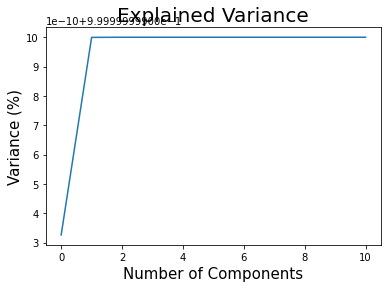

In [24]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA().fit(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

plt.show()

In [25]:
pca = PCA(n_components=3).fit(df)
pca_dataset = pca.transform(df)

# Lưu trữ dữ liệu thu được trong dataframe mới
pca_dataset= pd.DataFrame(data = pca_dataset, index = df.index)
pca_dataset

,0,1,2
0,-3.822553e+12,-6.824065e+07,-3.850755e+05
1,2.595310e+12,-2.028130e+06,3.414571e+06
2,-2.814871e+11,9.292614e+07,3.715281e+06
3,-3.505134e+12,-4.108613e+07,-4.732270e+05
4,2.763743e+12,7.290313e+07,-1.305604e+06
...,...,...,...
1356,1.927456e+12,-3.728103e+06,-7.346084e+05
1357,-9.639618e+11,1.510518e+07,-5.332629e+05
1358,-7.216471e+11,-7.940132e+07,-3.379078e+05
1359,-2.157893e+12,-5.910814e+07,-2.842614e+05


C:\Users\ACER\AppData\Local\Temp\ipykernel_8184\954689086.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


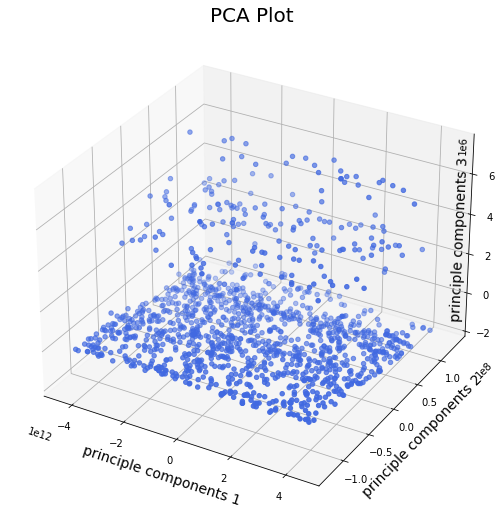

In [26]:
fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection ='3d')
x = list(pca_dataset.iloc[:,0])
y = list(pca_dataset.iloc[:,1])
z = list(pca_dataset.iloc[:,2])
ax.scatter(x, y, z, c='royalBlue', marker='o')

ax.set_title('PCA Plot', fontdict={'fontsize': 20})
ax.set_xlabel('principle components 1', fontdict={'fontsize': 14})
ax.set_ylabel('principle components 2', fontdict={'fontsize': 14})
ax.set_zlabel('principle components 3', fontdict={'fontsize': 14}, labelpad=-27)
fig.show()

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [28]:
import warnings
warnings.filterwarnings('ignore')
num_of_clusters = 10
k_means_score = pd.DataFrame(columns = range(2,num_of_clusters), index = ['sil_score'])

for k in range(2, num_of_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    k_means_score[k] = sil_score
k_means_score

,2,3,4,5,6,7,8,9
sil_score,0.636132,0.589633,0.578122,0.573522,0.570843,0.562692,0.560923,0.552692


In [29]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

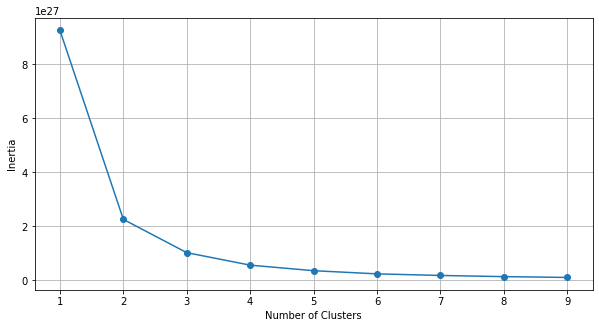

In [30]:
optimise_k_means(df,10)

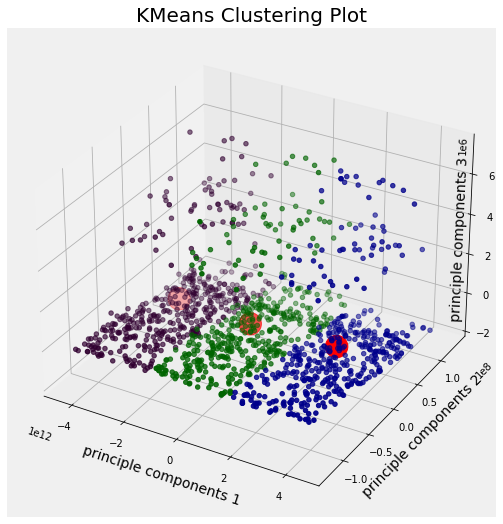

In [31]:
#Từ đồ thị ta chọn được n_clusters=3
kmeans = KMeans(n_clusters= 3, random_state=100).fit(pca_dataset)
    

cluster_centers = kmeans.cluster_centers_
C1 = cluster_centers[:, 0]
C2 = cluster_centers[:, 1]
C3 = cluster_centers[:, 2]


fig = plt.figure(figsize= (16,9))
ax = plt.axes(projection ='3d')

x = list(pca_dataset.iloc[:,0])
y = list(pca_dataset.iloc[:,1])
z = list(pca_dataset.iloc[:,2])

cmap = plt.cm.colors.ListedColormap(['#300030', '#00008b', '#006400'])
ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap=cmap)
ax.scatter(C1, C2, C3, color = 'red', s=500)

ax.set_facecolor('#f0f0f0')
ax.set_xlabel('principle components 1', fontdict={'fontsize': 14})
ax.set_ylabel('principle components 2', fontdict={'fontsize': 14})
ax.set_zlabel('principle components 3', fontdict={'fontsize': 14}, labelpad=-27)
ax.set_title('KMeans Clustering Plot', fontdict={'fontsize': 20})

plt.show()

In [32]:
y=df['price']
X=df.drop(['price'],axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print("Regression Report:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2):", r2)

In [36]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=2023)
decision_tree.fit(X_train, y_train)
y_pred_tree=decision_tree.predict(X_test)
regression_report(y_test, y_pred_tree)

Regression Report:
Mean Absolute Error (MAE): 5122.3178484107575
Mean Squared Error (MSE): 174226845.48655257
Root Mean Squared Error (RMSE): 13199.501713570577
R-squared (R^2): 0.9928010358145628


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=2023)
rf.fit(X_train, y_train)
y_pred_forest=rf.predict(X_test)
regression_report(y_test, y_pred_forest)

Regression Report:
Mean Absolute Error (MAE): 3520.8742053789733
Mean Squared Error (MSE): 59698421.21326676
Root Mean Squared Error (RMSE): 7726.475342176843
R-squared (R^2): 0.9975332917551181


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2023)
gbm.fit(X_train, y_train)
y_pred_gbm=gbm.predict(X_test)
regression_report(y_test, y_pred_gbm)

Regression Report:
Mean Absolute Error (MAE): 3149.331739954713
Mean Squared Error (MSE): 27632302.72872581
Root Mean Squared Error (RMSE): 5256.64367526712
R-squared (R^2): 0.9988582473777233


In [39]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
regression_report(y_test, y_pred_knn)

Regression Report:
Mean Absolute Error (MAE): 37409.658516707415
Mean Squared Error (MSE): 2602029936.194784
Root Mean Squared Error (RMSE): 51010.0964142863
R-squared (R^2): 0.8924854532733447


In [40]:
from sklearn.model_selection import KFold, cross_val_score


seed = 1000
def generate_baseline_results(models, X, y, metrics, cv=3, plot_results=False):
    # define k-fold:
    kfold = KFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # sort by accuracy
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)

    return baseline_results

models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=k)
]

baseline_results = generate_baseline_results(models, X, y, metrics='r2', cv=3, plot_results=False)
print(baseline_results)


                               Mean  Standard Deviation
model_name                                             
GradientBoostingRegressor  0.998777            0.000050
RandomForestRegressor      0.997127            0.001004
DecisionTreeRegressor      0.994916            0.001241
KNeighborsRegressor        0.880878            0.010744


In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(10, 5)
        self.layer2 = nn.Linear(5, 4)
        self.out = nn.Linear(4, 1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x

net = Net()

In [43]:
torch_X_train = torch.tensor(X_train).type(torch.float32)
torch_y_train = torch.tensor(y_train.values).type(torch.float32)

torch_X_test = torch.tensor(X_test).type(torch.float32)
torch_y_test = torch.tensor(y_test.values).type(torch.float32)


In [44]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [45]:
for x, target in zip(torch_X_train, torch_y_train):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

In [46]:
total_loss = 0
for x, target in zip(torch_X_test, torch_y_test):
    output = net(x)
    loss = criterion(output, target)
    total_loss += loss

avg_loss = total_loss / len(torch_X_test)

In [47]:
torch_rmse = torch.sqrt(avg_loss).detach().numpy()

In [48]:
print("PyTorch RMSE:", torch_rmse)

PyTorch RMSE: 212022.98
